In [1]:
import configparser
import json
import requests
import pandas as pd
import os
from time import gmtime, strftime
import time

In [2]:
from time import gmtime, strftime
import time
import datetime

result=time.gmtime()
year=result.tm_year
month=result.tm_mon
day=result.tm_mday
hour=result.tm_hour
minute=0
second=0
result.tm_hour
start_time_gmt = datetime.datetime(year, month, day-1,hour)
end_time_gmt = datetime.datetime(year, month, day,hour)
start_time=start_time_gmt.strftime("%Y-%m-%dT%H:%M:%SZ")
end_time=end_time_gmt.strftime("%Y-%m-%dT%H:%M:%SZ")

In [3]:
pd_coin_list=pd.read_json("https://api.coingecko.com/api/v3/coins/list")


array(['bitcoin', 'bitcoin-cash', 'ethereum', 'litecoin', 'ripple'],
      dtype=object)

In [4]:
#sample

#https://api.coingecko.com/api/v3/coins/bitcoin/market_chart?vs_currency=MYR&days=7&interval=hourly
coin_name =['Bitcoin', 'Bitcoin Cash', 'Ethereum', 'Litecoin', 'XRP']
coin_id=pd_coin_list[pd_coin_list.name.isin(coin_name)].id.values
coin_id

coin_name =['bitcoin', 'bitcoin cash', 'ethereum', 'itecoin', 'XRP']
vs_currency='MYR'
days='5'
interval='hourly'

df_market=dict()
url=dict()
df_market_all=pd.DataFrame()
for coin in coin_id:
    url[coin]=f"https://api.coingecko.com/api/v3/coins/{coin}/market_chart?vs_currency={vs_currency}&days={days}&interval={interval}"
    print (url[coin])
    df_market[coin]=pd.read_json(url[coin])
    df_market[coin]["coin"]=coin
    df_market_all=df_market_all.append(df_market[coin],ignore_index=True)
df_market_all


https://api.coingecko.com/api/v3/coins/bitcoin/market_chart?vs_currency=MYR&days=5&interval=hourly
https://api.coingecko.com/api/v3/coins/bitcoin-cash/market_chart?vs_currency=MYR&days=5&interval=hourly
https://api.coingecko.com/api/v3/coins/ethereum/market_chart?vs_currency=MYR&days=5&interval=hourly
https://api.coingecko.com/api/v3/coins/litecoin/market_chart?vs_currency=MYR&days=5&interval=hourly
https://api.coingecko.com/api/v3/coins/ripple/market_chart?vs_currency=MYR&days=5&interval=hourly


,prices,market_caps,total_volumes,coin
0,"[1622816444245, 150601.13757456315]","[1622816444245, 2830863301155.255]","[1622816444245, 159904499294.71872]",bitcoin
1,"[1622820681185, 151913.4690352508]","[1622820681185, 2844819882879.6157]","[1622820681185, 160362246183.18314]",bitcoin
2,"[1622822962993, 152498.41346028878]","[1622822962993, 2864663480028.935]","[1622822962993, 164925683808.31448]",bitcoin
3,"[1622827457317, 152936.00049281243]","[1622827457317, 2863172393938.226]","[1622827457317, 163318620005.9318]",bitcoin
4,"[1622830960511, 152907.35498819296]","[1622830960511, 2862479282399.077]","[1622830960511, 160528257126.50317]",bitcoin
...,...,...,...,...
601,"[1623233603868, 3.5351151424185963]","[1623233603868, 164028914633.6205]","[1623233603868, 19467883942.859642]",ripple
602,"[1623236718407, 3.582928502439666]","[1623236718407, 165954769597.18463]","[1623236718407, 19619993044.279007]",ripple
603,"[1623240559906, 3.634914978478456]","[1623240559906, 166947808516.89603]","[1623240559906, 20692450658.246227]",ripple
604,"[1623244003333, 3.570830621755828]","[1623244003333, 165046781745.39984]","[1623244003333, 19874087899.822742]",ripple


In [6]:
df_market_all.head()

,prices,market_caps,total_volumes,coin
0,"[1622816444245, 150601.13757456315]","[1622816444245, 2830863301155.255]","[1622816444245, 159904499294.71872]",bitcoin
1,"[1622820681185, 151913.4690352508]","[1622820681185, 2844819882879.6157]","[1622820681185, 160362246183.18314]",bitcoin
2,"[1622822962993, 152498.41346028878]","[1622822962993, 2864663480028.935]","[1622822962993, 164925683808.31448]",bitcoin
3,"[1622827457317, 152936.00049281243]","[1622827457317, 2863172393938.226]","[1622827457317, 163318620005.9318]",bitcoin
4,"[1622830960511, 152907.35498819296]","[1622830960511, 2862479282399.077]","[1622830960511, 160528257126.50317]",bitcoin


In [31]:
df_market_clean=df_market_all.copy()
df_market_clean[["epoch1","price"]]=pd.DataFrame(df_market_clean.prices.tolist(), index= df_market_clean.index)
df_market_clean[["epoch2","market_caps_2"]]=pd.DataFrame(df_market_clean.market_caps.tolist(), index= df_market_clean.index)
df_market_clean[["epoch3","total_volumes_2"]]=pd.DataFrame(df_market_clean.total_volumes.tolist(), index= df_market_clean.index)
df_market_clean["time"]=pd.to_datetime(df_market_clean['epoch1'],unit='ms')
df_market_clean=df_market_clean[["time","price","coin"]]


In [32]:
df_market_clean


,time,price,coin
0,2021-06-04 14:20:44.245,150601.137575,bitcoin
1,2021-06-04 15:31:21.185,151913.469035,bitcoin
2,2021-06-04 16:09:22.993,152498.413460,bitcoin
3,2021-06-04 17:24:17.317,152936.000493,bitcoin
4,2021-06-04 18:22:40.511,152907.354988,bitcoin
...,...,...,...
601,2021-06-09 10:13:23.868,3.535115,ripple
602,2021-06-09 11:05:18.407,3.582929,ripple
603,2021-06-09 12:09:19.906,3.634915,ripple
604,2021-06-09 13:06:43.333,3.570831,ripple


<AxesSubplot:xlabel='time', ylabel='price'>

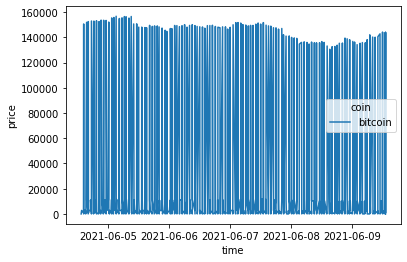

In [28]:
import seaborn as sns
#df_market_clean[["time","price","market_caps_2","total_volumes_2"]]
#sns.lineplot(data=df_market_clean[["time","price","market_caps_2","total_volumes_2"]])

#pd.melt(df_market_clean, ['time'])
sns.lineplot(data=df_market_clean,x="time",y="price",hue='coin')

<AxesSubplot:xlabel='time', ylabel='price'>

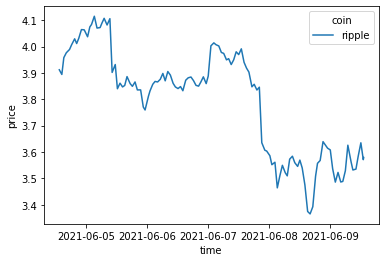

In [36]:
df_market_clean[df_market_clean.coin=="bitcoin"]
#sns.lineplot(data=df_market_clean[df_market_clean.coin=="bitcoin"],x="time",y="price",hue='coin')
sns.lineplot(data=df_market_clean[df_market_clean.coin=="ripple"],x="time",y="price",hue='coin')

TypeError: Index(...) must be called with a collection of some kind, 'time' was passed